In [1]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
import sys
sys.path.append('./lib')
from lib.cleaning import *
from lib.data_prepration import *
from lib.paralellism import *
from lib.mydoc2vec import *
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

from gensim.models import Doc2Vec
from collections import namedtuple
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
#!pip install scipy==1.12
SEED = 448

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
"""
!pip install pandarallel
!pip install nltk 
!python.exe -m pip install --upgrade pip
!pip install gensim
!pip install scipy==1.12 --upgrade"""

In [2]:

keep_cols=['title', 'price', 'helpfulness', 'score', 'time',
       'summary', 'text', 'description', 'authors', 'publisher',
       'publisheddate', 'categories', 'ratingscount']
file_path = '../data/book_review_single.csv'
data_prep = DataPreparation(file_path)
data_prep.light_clean_and_preprocess(True)
data_prep.Normalize()
data_prep.data=data_prep.data[keep_cols]

#data_prep.data=data_prep.data.sample(frac=0.3,random_state=SEED)
data_prep.data.categories.value_counts().sum()

209457

In [3]:
copied=data_prep.data.copy()

In [4]:
#data_prep.data['categories']=data_prep.data['categories'].apply(lambda x: x.lower().replace(']','').replace('[','') if isinstance(x, str) else x)
data_prep.data.categories.value_counts()

categories
[]                            40344
[fiction]                     23004
[religion]                     9358
[history]                      9243
[juvenile fiction]             6563
                              ...  
[bulls, papal]                    1
[yoruba language]                 1
[discrimination in sports]        1
[indian territory]                1
[basilicas]                       1
Name: count, Length: 10789, dtype: int64

In [4]:
filtered_groups = data_prep.data.groupby('title')  # Filter groups with duplicates
single_repeated_row = filtered_groups.head(1) 
single_repeated_row

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount
0,la misteriosa llama de la reina loana,29.825947,0.75,5.0,2005-09-03,"exigencia, exclusivo, genial","ciertamente exigente, es una lectura que exige...","�una novela llam�mosle existencialista, y a la...","[umberto. eco, umberto eco]",,2017-08-29,[fiction],20.73805
1,scaling urban environmental challenges: from l...,44.000000,0.5,5.0,2007-06-09,a seminal work on global change and urban syst...,the unique contribution of this book is its me...,"�think globally, act locally� emphasizes the i...","[peter marcotullio, gordon mcgranahan]",earthscan,2017-08-29,[architecture],20.73805
2,investment euphoria and money madness: the inn...,24.870000,0.666667,3.0,2000-06-10,a solid but basic introduction,this book offers a good although basic introdu...,� invest under stressful circumstances and mak...,[harry e. gunn],global professional publishi,2017-08-29,[business & economics],20.73805
3,the international handbook of convertible secu...,29.825947,1.0,1.0,2002-06-25,second-hand book-bin candidate extraordinaire,here is an investment volume screaming for a r...,� aimed at all investors seeking exceptional r...,"[thomas c. noddings, susan c. christoph, john ...",global professional publishi,2017-08-29,[convertible securities],20.73805
4,moonage daydream: the life & times of ziggy st...,29.825947,0.965517,4.0,2005-09-29,almost perfect,"this book would be simply superb, but david ye...",﻿﻿'the closest we'll ever get to a straight up...,[david bowie],genesis publications,2022-06-14,[biography & autobiography],20.73805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209452,the dirty pair ii: dangerous acquaintances (di...,29.825947,,4.0,2007-12-06,dirty pair: sim hell,in this story we find our two heroines going f...,,[],,2006-01-01,"[comic books, strips, etc]",20.73805
209453,the iscariot conspiracy,29.825947,1.0,5.0,2002-04-26,no hope for a good nights sleep.,"having read al's previous novel, murder on wal...",,[al blanchard],,2001-11-01,[fiction],20.73805
209454,the saint in england,29.825947,1.0,4.0,2010-04-12,saint saga #22,"this full-length saint adventure, although pub...",,[leslie charteris],,2001-11-01,[],20.73805
209455,"shecky's bar, club and lounge guide for chicago",29.825947,1.0,1.0,2001-07-18,what a bust,while &quot;shecky's&quot; intentions were sur...,,[chris hoffman],hangover productions incorporated,2001-02-12,[travel],20.73805


In [5]:
single_repeated_row.isnull().sum()

title            0
price            0
helpfulness      0
score            0
time             0
summary          0
text             0
description      0
authors          0
publisher        0
publisheddate    0
categories       0
ratingscount     0
dtype: int64

In [6]:
join_func = lambda x: ' '.join(map(str, x))
single_repeated_row['all']=single_repeated_row['title'].str.strip()+" "+single_repeated_row['categories'].apply(join_func).str.strip()

In [7]:
single_repeated_row['all']

0             la misteriosa llama de la reina loana fiction
1         scaling urban environmental challenges: from l...
2         investment euphoria and money madness: the inn...
3         the international handbook of convertible secu...
4         moonage daydream: the life & times of ziggy st...
                                ...                        
209452    the dirty pair ii: dangerous acquaintances (di...
209453                      the iscariot conspiracy fiction
209454                                the saint in england 
209455    shecky's bar, club and lounge guide for chicag...
209456    better homes and gardens casual entertaining c...
Name: all, Length: 209457, dtype: object

In [8]:
data_prep.data=single_repeated_row

In [10]:

"""d_not_fic=data_prep.data[data_prep.data['categories'].apply(lambda x: 'Fiction' not in x)].sample(frac=0.4)
d_fic=data_prep.data[data_prep.data['categories'].apply(lambda x: 'Fiction'  in x)].sample(frac=0.1)
d_not_fic.categories.value_counts().sum(),d_fic.categories.value_counts().sum()"""


"d_not_fic=data_prep.data[data_prep.data['categories'].apply(lambda x: 'Fiction' not in x)].sample(frac=0.4)\nd_fic=data_prep.data[data_prep.data['categories'].apply(lambda x: 'Fiction'  in x)].sample(frac=0.1)\nd_not_fic.categories.value_counts().sum(),d_fic.categories.value_counts().sum()"

In [11]:
"""balanced=pd.concat([d_not_fic,d_fic,single_repeated_row], ignore_index=True)
balanced.to_csv('../data/balanced.csv')"""

"balanced=pd.concat([d_not_fic,d_fic,single_repeated_row], ignore_index=True)\nbalanced.to_csv('../data/balanced.csv')"

In [12]:
"""

keep_cols=['title', 'price', 'helpfulness', 'score', 'time',
       'summary', 'text', 'description', 'authors', 'publisher',
       'publisheddate', 'categories', 'ratingscount']
file_path = '../data/one_half.csv'
data_prep = DataPreparation(file_path)
data_prep.read_large_csv()
random.seed(SEED)

data_prep.data=data_prep.data[keep_cols]
data_prep.data"""

"\n\nkeep_cols=['title', 'price', 'helpfulness', 'score', 'time',\n       'summary', 'text', 'description', 'authors', 'publisher',\n       'publisheddate', 'categories', 'ratingscount']\nfile_path = '../data/one_half.csv'\ndata_prep = DataPreparation(file_path)\ndata_prep.read_large_csv()\nrandom.seed(SEED)\n\ndata_prep.data=data_prep.data[keep_cols]\ndata_prep.data"

In [13]:
data_prep.data.columns

Index(['title', 'price', 'helpfulness', 'score', 'time', 'summary', 'text',
       'description', 'authors', 'publisher', 'publisheddate', 'categories',
       'ratingscount', 'all'],
      dtype='object')

In [14]:
len(data_prep.data)

209457

In [15]:
print(len(data_prep.data))
print(data_prep.data.info())
print(data_prep.data.describe())

209457
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209457 entries, 0 to 209456
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   title          209457 non-null  object        
 1   price          209457 non-null  float64       
 2   helpfulness    209457 non-null  object        
 3   score          209457 non-null  float64       
 4   time           209457 non-null  datetime64[ns]
 5   summary        209457 non-null  object        
 6   text           209457 non-null  object        
 7   description    209457 non-null  object        
 8   authors        209457 non-null  object        
 9   publisher      209457 non-null  object        
 10  publisheddate  209457 non-null  datetime64[ns]
 11  categories     209457 non-null  object        
 12  ratingscount   209457 non-null  float64       
 13  all            209457 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(9)
m

In [16]:
data_prep.data.isnull().sum()

title            0
price            0
helpfulness      0
score            0
time             0
summary          0
text             0
description      0
authors          0
publisher        0
publisheddate    0
categories       0
ratingscount     0
all              0
dtype: int64

In [33]:
data_prep.data.isnull().sum()

title            0
price            0
helpfulness      0
score            0
time             0
summary          0
text             0
description      0
authors          0
publisher        0
publisheddate    0
categories       0
ratingscount     0
all              0
dtype: int64

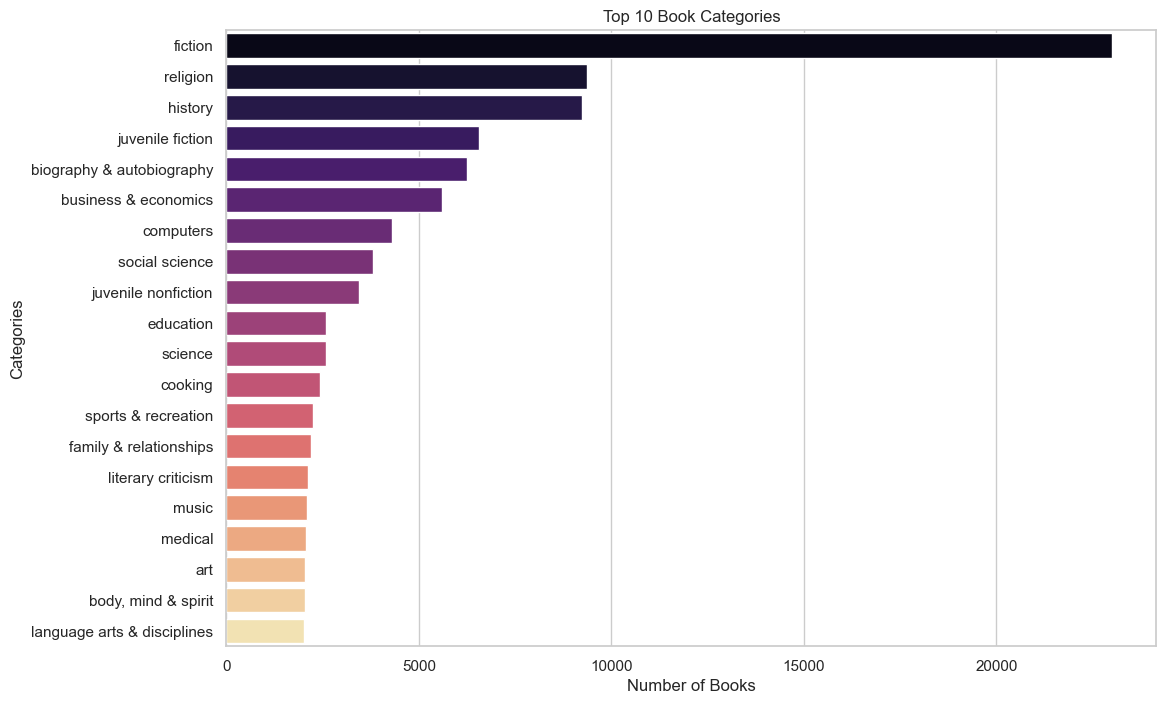

In [34]:
data_prep.generate_plots()

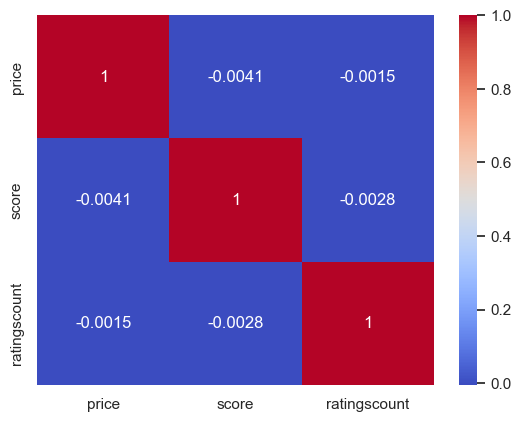

In [15]:
corr_matrix = data_prep.data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
"""join_func = lambda x: ', '.join(map(str, x))
data_prep.data['all']=data_prep.data['title'] + data_prep.data['description'] + data_prep.data['authors'].apply(join_func)+data_prep.data['categories'].apply(join_func)
data_prep.data['all']"""


In [35]:

_doc2vec = Doc2VecRecommender( min_count=2, workers=8, epochs=25)
testdata=_doc2vec.train_hole(data_prep.data)


In [36]:
_doc2vec.model.save("./models/doc2vec_model_title")

In [37]:
_doc2vec_load = Doc2VecRecommender(data_prep.data)
_doc2vec_load.load_model('./models/doc2vec_model_title')


In [38]:
search='forrest bird jungle without lion and wolf'
_doc2vec_load.recommend_by_text([search]) 

,0
0,"religion without revelation,"
1,the house without a christmas tree
2,war without heroes
3,"billiards without a master,"
4,the arya samaj: hindu without hinduism
5,men without women
6,the house without a door
7,the rose without a thorn
8,surviving without a secretary (crisp fifty min...
9,animals without backbones: an introduction to ...


In [9]:
data_prep.data=data_prep.data.reset_index()
data_prep.data

,index,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount,all
0,0,la misteriosa llama de la reina loana,29.825947,0.75,5.0,2005-09-03,"exigencia, exclusivo, genial","ciertamente exigente, es una lectura que exige...","�una novela llam�mosle existencialista, y a la...","[umberto. eco, umberto eco]",,2017-08-29,[fiction],20.73805,la misteriosa llama de la reina loana fiction
1,1,scaling urban environmental challenges: from l...,44.000000,0.5,5.0,2007-06-09,a seminal work on global change and urban syst...,the unique contribution of this book is its me...,"�think globally, act locally� emphasizes the i...","[peter marcotullio, gordon mcgranahan]",earthscan,2017-08-29,[architecture],20.73805,scaling urban environmental challenges: from l...
2,2,investment euphoria and money madness: the inn...,24.870000,0.666667,3.0,2000-06-10,a solid but basic introduction,this book offers a good although basic introdu...,� invest under stressful circumstances and mak...,[harry e. gunn],global professional publishi,2017-08-29,[business & economics],20.73805,investment euphoria and money madness: the inn...
3,3,the international handbook of convertible secu...,29.825947,1.0,1.0,2002-06-25,second-hand book-bin candidate extraordinaire,here is an investment volume screaming for a r...,� aimed at all investors seeking exceptional r...,"[thomas c. noddings, susan c. christoph, john ...",global professional publishi,2017-08-29,[convertible securities],20.73805,the international handbook of convertible secu...
4,4,moonage daydream: the life & times of ziggy st...,29.825947,0.965517,4.0,2005-09-29,almost perfect,"this book would be simply superb, but david ye...",﻿﻿'the closest we'll ever get to a straight up...,[david bowie],genesis publications,2022-06-14,[biography & autobiography],20.73805,moonage daydream: the life & times of ziggy st...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209452,209452,the dirty pair ii: dangerous acquaintances (di...,29.825947,,4.0,2007-12-06,dirty pair: sim hell,in this story we find our two heroines going f...,,[],,2006-01-01,"[comic books, strips, etc]",20.73805,the dirty pair ii: dangerous acquaintances (di...
209453,209453,the iscariot conspiracy,29.825947,1.0,5.0,2002-04-26,no hope for a good nights sleep.,"having read al's previous novel, murder on wal...",,[al blanchard],,2001-11-01,[fiction],20.73805,the iscariot conspiracy fiction
209454,209454,the saint in england,29.825947,1.0,4.0,2010-04-12,saint saga #22,"this full-length saint adventure, although pub...",,[leslie charteris],,2001-11-01,[],20.73805,the saint in england
209455,209455,"shecky's bar, club and lounge guide for chicago",29.825947,1.0,1.0,2001-07-18,what a bust,while &quot;shecky's&quot; intentions were sur...,,[chris hoffman],hangover productions incorporated,2001-02-12,[travel],20.73805,"shecky's bar, club and lounge guide for chicag..."


In [ ]:
#data_prep.data.to_csv('../data/cleared_columns.csv')

In [10]:
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')
def preprocess(sentence,lemmatizer,stop_words_temp=stop_words):
    
    tokens = nltk.word_tokenize(sentence,language='english')
    tokens=[word for word in tokens if word not in stop_words_temp]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

lemmatizer = WordNetLemmatizer()

documents = [TaggedDocument(preprocess(doc,lemmatizer), [i]) for i, doc in enumerate(data_prep.data['all'])]
def filter_strings_by_length(lst):
    return [item for item in lst if len(item) > 2]
dts=[' '.join(filter_strings_by_length(d.words)) for d in documents]
data_prep.data['all_clear']=dts


[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
data_prep.data.isnull().sum()

index            0
title            0
price            0
helpfulness      0
score            0
time             0
summary          0
text             0
description      0
authors          0
publisher        0
publisheddate    0
categories       0
ratingscount     0
all              0
all_clear        0
dtype: int64

In [12]:
csvfile='../data/cleared_columns_title.csv'

In [14]:

data_prep.data.to_csv(csvfile)

In [18]:
dfread=pd.read_csv(csvfile)
dfread['title'].fillna('unkown',inplace=True)
dfread[dfread['all_clear'].isnull()]['all_clear']=dfread[dfread['all_clear'].isnull()].all
dfread['all_clear'].fillna('unkown',inplace=True)

dfread.isnull().sum()

C:\Users\alire\AppData\Local\Temp\ipykernel_23020\3038036018.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dfread=pd.read_csv(csvfile)
C:\Users\alire\AppData\Local\Temp\ipykernel_23020\3038036018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfread[dfread['all_clear'].isnull()]['all_clear']=dfread[dfread['all_clear'].isnull()].all


Unnamed: 0           0
index                0
title                0
price                0
helpfulness      37406
score                0
time                 0
summary             16
text                 0
description      67158
authors              0
publisher        74520
publisheddate        0
categories           0
ratingscount         0
all                  0
all_clear            0
dtype: int64

In [19]:
dfread.isnull().sum()

Unnamed: 0           0
index                0
title                0
price                0
helpfulness      37406
score                0
time                 0
summary             16
text                 0
description      67158
authors              0
publisher        74520
publisheddate        0
categories           0
ratingscount         0
all                  0
all_clear            0
dtype: int64

In [20]:
dfread.to_csv(csvfile)